In [33]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 로그 수익률

In [8]:
import pandas as pd
import numpy as np

from datetime import datetime
from pandas_datareader import data, wb

start = datetime(2015, 1, 1)
end = datetime(2015, 12, 30)

df = data.get_data_yahoo("005930.KS", start, end)
df['Ret'] = np.log( df['Adj Close'] / df ['Adj Close'].shift(1) )


In [9]:
df.head(10)

,Open,High,Low,Close,Volume,Adj Close,Ret
Date,,,,,,,
2015-01-01,1327000,1327000,1327000,1327000,0,1305014.42,NaN
2015-01-02,1340000,1340000,1327000,1330000,175400,1307964.71,0.002258
2015-01-05,1336000,1336000,1313000,1333000,202700,1310915.01,0.002253
2015-01-06,1315000,1317000,1288000,1295000,304700,1273544.59,-0.028921
2015-01-07,1294000,1311000,1282000,1307000,286400,1285345.77,0.009224
2015-01-08,1339000,1339000,1310000,1314000,289500,1292229.80,0.005341
2015-01-09,1314000,1322000,1314000,1314000,186200,1292229.80,0.000000
2015-01-12,1313000,1319000,1301000,1316000,166500,1294196.66,0.001521
2015-01-13,1314000,1340000,1300000,1339000,245800,1316815.60,0.017326


## 기본통계 값
- DataFrame.describe()
- 자주 사용하는 통계 요약값들을 반환 - 개수, 평균, 표준편차, 최소, 최대, 사분위 값
- 값을 각각 얻을 수 도 있다.

In [10]:
df['Ret'].describe()

count    259.000000
mean      -0.000136
std        0.016384
min       -0.044054
25%       -0.010398
50%        0.000000
75%        0.008377
max        0.083312
Name: Ret, dtype: float64

In [11]:
count, bins = np.histogram(df['Ret'], bins = np.arange(-0.07, +0.07, 0.01))

print (count)
print (bins)

[ 0  0  1  9 17 40 49 90 30 14  5  3  0  0]
[-0.07 -0.06 -0.05 -0.04 -0.03 -0.02 -0.01  0.    0.01  0.02  0.03  0.04
  0.05  0.06  0.07]


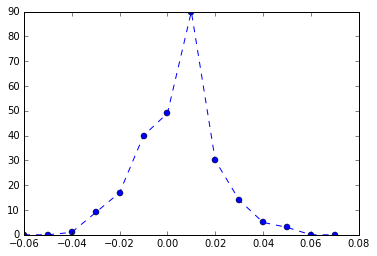

In [12]:
import matplotlib.pyplot as plt
plt.plot(bins[1:], count, 'o--')

# DataFrame.hist
간단하게 DataFrame.hist()를 사용하여 그려볼 수 있다.

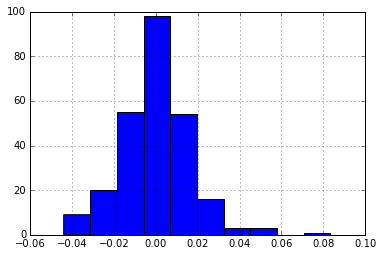

In [13]:
df['Ret'].hist()

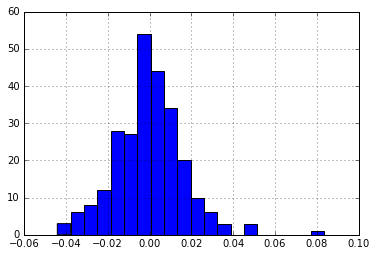

In [25]:
df['Ret'].hist(bins=20)

## 정규분포
- 정규분포(Normal Distribution, 가우스 분포)는 연속확률분포의 하나
- 수집된 자료의 분포를 근사하는 데에 자주 사용 (중심극한정리, 독립적인 확률변수들의 평균은 정규분포에 가까워지는 성질)
- 정규분포는 2개의 매개 변수 평균 $\mu$과 표준편차 $\sigma$에 대해 모양이 결정, 이때의 분포를 $\mathrm{N}(\mu, \sigma^2)$로 표기
- 표준정규분포: 평균이 0이고 표준편차가 1인 정규분포 $\mathrm{N}(0, 1)$

- 주식수익율은 셀수있는 이산확율분포, 하지만 범주가 많아지면 계산이 복잡, 연속확율분포에 근사하여 분석


## 확률밀도함수
- 확률밀도함수(PDF, Probalibity Distribution Function)

$$ \frac{1}{\sqrt{2\pi\sigma^2}}\operatorname{exp}\left\{-\frac{\left(x-\mu\right)^2}{2\sigma^2}\right\} $$

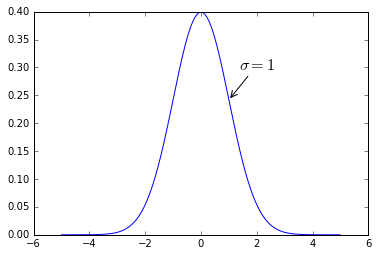

In [16]:
import math

def prob_dist(x, mu, sigma):
    denom = math.sqrt(2 * math.pi * sigma ** 2)
    num = math.exp(-(float(x)-float(mu))**2/(2*sigma**2))
    return num/denom

mu = 0
sigma = 1
pdf = []

r = np.arange(-5, 5, 0.01)
for x in r:
  pdf.append( prob_dist(x, mu, sigma) )
plt.plot(r, pdf)

plt.annotate(r'$\sigma=1$',
         xy=(1, prob_dist(1, mu, sigma)), xycoords='data',
         xytext=(+10, +30), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="->"))

## 정규분포
- 정규분포(Normal Distribution Function)
- mu, sigma의 값에 따른 모양

<img width=400 src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/720px-Normal_Distribution_PDF.svg.png" >


## 정규확율분포함수
- Normal Probability Distribution Function, Normal PDF
- y = stats.norm.pdf( bins, mu, sigma)

## 표준정규분포
- 평균 $ \mu = 0 $ , 분산 $\sigma^2 = 1 $ 인 정규분포

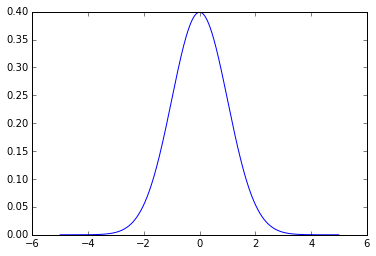

In [24]:
from scipy import stats
r = np.arange(-5, 5, 0.01)

mu = 0
sigma = 1

plt.plot(r, stats.norm.pdf(r, mu, sigma))


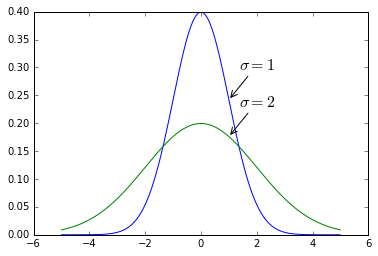

In [17]:
from scipy import stats

r = np.arange(-5, 5, 0.01)

mu = 0
sigma = 1
plt.plot(r, stats.norm.pdf(r, mu, sigma), color='b')

plt.annotate(r'$\sigma=1$', xy=(1, stats.norm.pdf(1, mu, sigma)), 
         xytext=(+10, +30), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="->"))

sigma = 2
plt.plot(r, stats.norm.pdf(r, mu, sigma), color='g')

plt.annotate(r'$\sigma=2$', xy=(1, stats.norm.pdf(1, mu, sigma)), 
         xytext=(+10, +30), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="->"))


## scipy.stats
- norm.pdf(x, mu, sigma)
- norm.cdf(x, mu, sigma)

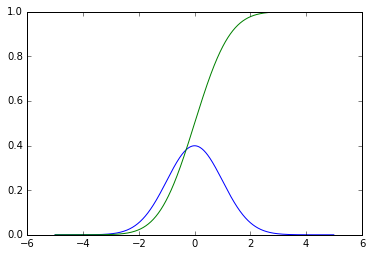

In [18]:
from scipy.stats import norm

x = np.arange(-5, 5, 0.01)

mu, sigma = 0, 1

plt.plot(x, norm.pdf(x, mu, sigma))
plt.plot(x, norm.cdf(x, mu, sigma))


# 히스토그램
 * ^KS11 
 * ^KQ11

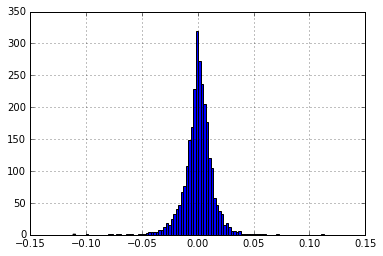

In [40]:
start = datetime(2005, 1, 1)
end = datetime(2015, 12, 30)

df = data.get_data_yahoo("^KS11", start, end)
df['Ret'] = np.log( df['Adj Close'] / df ['Adj Close'].shift(1) )
df['Ret'].hist(bins=100)

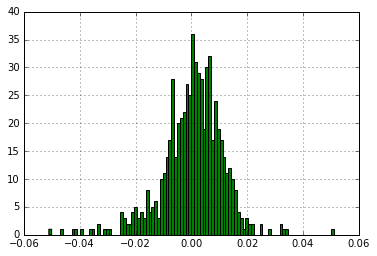

In [41]:
start = datetime(2005, 1, 1)
end = datetime(2015, 12, 30)

df = data.get_data_yahoo("^KQ11", start, end)
df['Ret'] = np.log( df['Adj Close'] / df ['Adj Close'].shift(1) )

df['Ret'].hist(bins=100, color='green')